# **Introduction of Assignment**




At the core of Monte Carlo simulation lies the generation of random numbers. Therefore, this notebook will describe two different techniques for generating random numbers. In addition, we will describe a procedure for generating correlated normal (Gaussian) random numbers and implement the generation of correlated normal random numbers from uncorrelated random numbers.

In [ ]:
# Import Useful Pacakges:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install openturns
import openturns as ot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 11.5 MB/s eta 0:00:00


##**1. Pseudo-random number generators**

Introduction of PRNG:

A Pseudo Random Number Generator (PRNG) is an algorithm that utilizes mathematical formulas to generate squences of numbers that approximate the properties of random numbers. The PRNG generates these numbers from an arbitrary starting state known as a seed state. Although the numbers are not truly random, they possess similar properties as random numbers. PRNGs can generate a large number of sequences quickly and can also reproduce the same sequence later if the starting point in the squence is known. Therefore, the numbers generated are both deterministic and efficient.

In the following code, we will show two different algorithm of PRNG for generating random vairables.

**1.1: Pseudo-random number generator (LCG)**

LCG Generator: This is the most common and oldest algorithm for PRNG, we generate the next random integer using the previous random interger, the interger constants, and the integer modulus. To get started, the algorithm required an initial seed.

Formula for LCG: $X_{n+1} = (aX_{n} + c )\mod m $

* Where X is the sequence of PRNG 
* Initial seed: $X_{n}$ (0≤$X_{n}$<m)
* Modulus: m (0<m)
* Multiplier: a (0<a<m)
* Increment: c (0≤c<m)






In [ ]:
# Using Linear Congruential Generator (LCG) to generate two sets of uncorrelated random variables:
def LCG(seed, a, c, m ,n):
  # Initialize the output list
  u = np.zeros(n)
  # Generate the sequence
  for i in range(n):
    seed = (a * seed + c) % m
    # Normalization for box muller
    u[i] = seed/m
  return u

# Call the LCG function:
seed_1 = 1622
a_1 = 214013
c_1 = 2531011
m_1 = 2**32
n_1= 1000000
LCG_output_1 = LCG(seed_1, a_1 ,c_1, m_1, n_1)

seed_2 = 1624
a_2 = 214013
c_2 = 2531011
m_2 = 2**32
n_2 = 1000000
LCG_output_2 = LCG(seed_2, a_2, c_2, m_2, n_2)
print(LCG_output_1)
print(LCG_output_2)

[0.08141159 0.13822505 0.95795395 ... 0.13973381 0.85146749 0.11331609]
[0.08151124 0.46624038 0.50312519 ... 0.16611282 0.30376784 0.26805989]


In [ ]:
myset_1 = set(LCG_output_1)
myset_2 = set(LCG_output_2)

# Check if the list contains duplicates:
def checklist(LCG_output, myset):
  if len(LCG_output) != len(myset):
    print("duplicates found in the list")
  else:
    print("No duplicates found in the list")
checklist(LCG_output_1, myset_1)
checklist(LCG_output_2, myset_2)

No duplicates found in the list
No duplicates found in the list


The reason why I want to check for duplicates in the list is that I noticed that the LCG sequence recurs every 10 numbers when I adjust the parameters of the LCG equation. This is caused by a small value of "m". To address this issue, I increased "m" to the maximum possible value. The code presented above is just performing a check.

**1.2：Pseudo-random number generator (Mersenne Twister)**

Mersenne Twister: This is a highly complex type of PRNG that is based on linear feedback shift registers (LFSR) and finite field theory. One of the most well-known applications of the Mersenne Twister is in the np.random module. The following code demonstrates how the function works.

In [ ]:
# Mersenne Twister
# Generate uniformly distributed random numbers between [0,1)
MT_1 = np.random.rand(1000000)
MT_1

array([0.11381084, 0.42405584, 0.4307656 , ..., 0.04432275, 0.98633477,
       0.11184892])

## **2. Quasirandom Squences**
Quasi-random Squence is also known as low-discrepancy sequence(LDS).The discrepancy of a sequence is low when the proportion of points in the sequence falling into a arbitrary set B is close to proportional to the measure of B. Intuitively, points are located more evenly that random generated numbers on 2-d scale.

The quasi modifier denotes that the values of LDS are neither random nor pseudorandom, but such sequences share some properties of random variables and in certain applications such as quasi-Monte Carlo method their lower discrepancy is an important advantage.

**2.1: How is low-discrepancy sequence(LDS) derived?**

There are many kinds of LDS:


*   `van der Corput sequences`
*   **`Halton sequecne`**
*   `scrambled Halton`
*   `Hammersley`
*   `Sobol sequence`
*   ......

Take **`Halton sequecne`** as an example. Halton can generate a set of points evenly distributed on infinite dimensions. The definition of Halton sequence is simple: $ Xi:=(Φ_{b1}(i),...,Φ_{bn}(i)) $, that is, each dimension is a `Van der Corput` sequence based on different base numbers bn, where b1...bn is primes of each other. 

A `van der Corput` sequence is an example of the simplest one-dimensional low-discrepancy sequence over the unit interval.

$ n = d_{0}(n)*b^0+...+d_{L-1}(n)*b^{L-1} $

$ Φ_{b}(n) = d_{0}(n)*b^{-1}+...+d_{L-1}(n)*b^{-L} $

In [ ]:
# Mathematical Expression of van der Corput sequences
def van_der_Corput(b):
    """Generator function for Halton sequence."""
    n, d = 0, 1
    while True:
        x = d - n
        if x == 1:
            n = 1
            d *= b
        else:
            y = d // b
            while x <= y:
                y //= b
            n = (b + 1) * y - x
        yield n / d

Let's write a Halton sequence with base 2.

The nth number of this sequence is the number n written in binary representation, inverted, and written after the decimal point.

As an example, to find the 1st element of the above sequence,
we'd write 

$ 1 = 1*2^0= 1_{2} $

which can be inverted and placed after the decimal point to give 

$ 0.1_{2} = 1*2^{-1} = \frac{1}{2} $ 

Therefore, the 1st element of the sequence is $ \frac{1}{2} $ 

To find the sixth element of the above sequence, we'd write 

$ 6 = 1*2^2 + 1*2^1 + 0*2^0 = 110_{2} $

which can be inverted and placed after the decimal point to give 

$ 0.011_{2} = 0*2^{-1} + 1*2^{-2} + 1*2^{-3} = \frac{3}{8} $

Therefore, the 6th element of the sequence is $ \frac{3}{8} $

**Let's see if it is true!**

In [ ]:
#2 base van der Corput sequence
van_der_corput_sequence=[]
n=0
for i in van_der_Corput(2):
  if n<10:
    van_der_corput_sequence.append(i)
    n+=1
  else:
    break

print("First 10 entrie of a van_der_corput_sequence\n")
print(van_der_corput_sequence)

First 10 entrie of a van_der_corput_sequence

[0.5, 0.25, 0.75, 0.125, 0.625, 0.375, 0.875, 0.0625, 0.5625, 0.3125]


**2.2: Comparision between pseudo-random and low-discrepancy sequence**

2.2.1 `Halton Sequence` versus np.random

Text(0.5, 1.0, 'Halton')

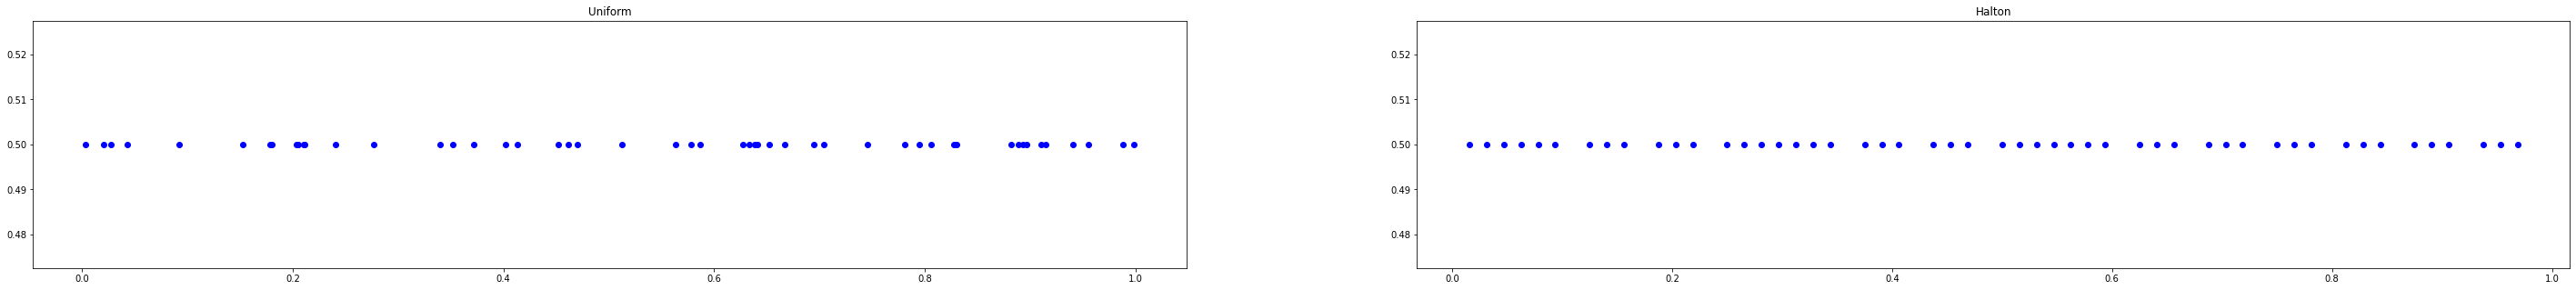

In [ ]:
# one dimensional
rand_data_1d = np.hstack([np.random.uniform(0,1,50).reshape(50,1),0.5*np.ones(50).reshape(50,1)])
sequence_1d = ot.LowDiscrepancySequence(ot.HaltonSequence(1))
halton_data_1d = np.array(sequence_1d.generate(50))
halton_data_1d = np.hstack([halton_data_1d,0.5*np.ones(50).reshape(50,1)])

fig,axes=plt.subplots(1,2,figsize=(50,5))
axes[0].plot(rand_data_1d[:,0],rand_data_1d[:,1],'bo')
axes[0].set_title("Uniform")
axes[1].plot(halton_data_1d[:,0],halton_data_1d[:,1],'bo')
axes[1].set_title("Halton")

In above graphs, the left one shows how 50 points are distributed in np.random sequence, whereas the right one shows how how 50 points are distributed in `Halton sequence`.

In 1d(one dimension), we can already see that the points are distributed more uniformly in `Halton sequence`. Now let's take a look at 2d situdation.

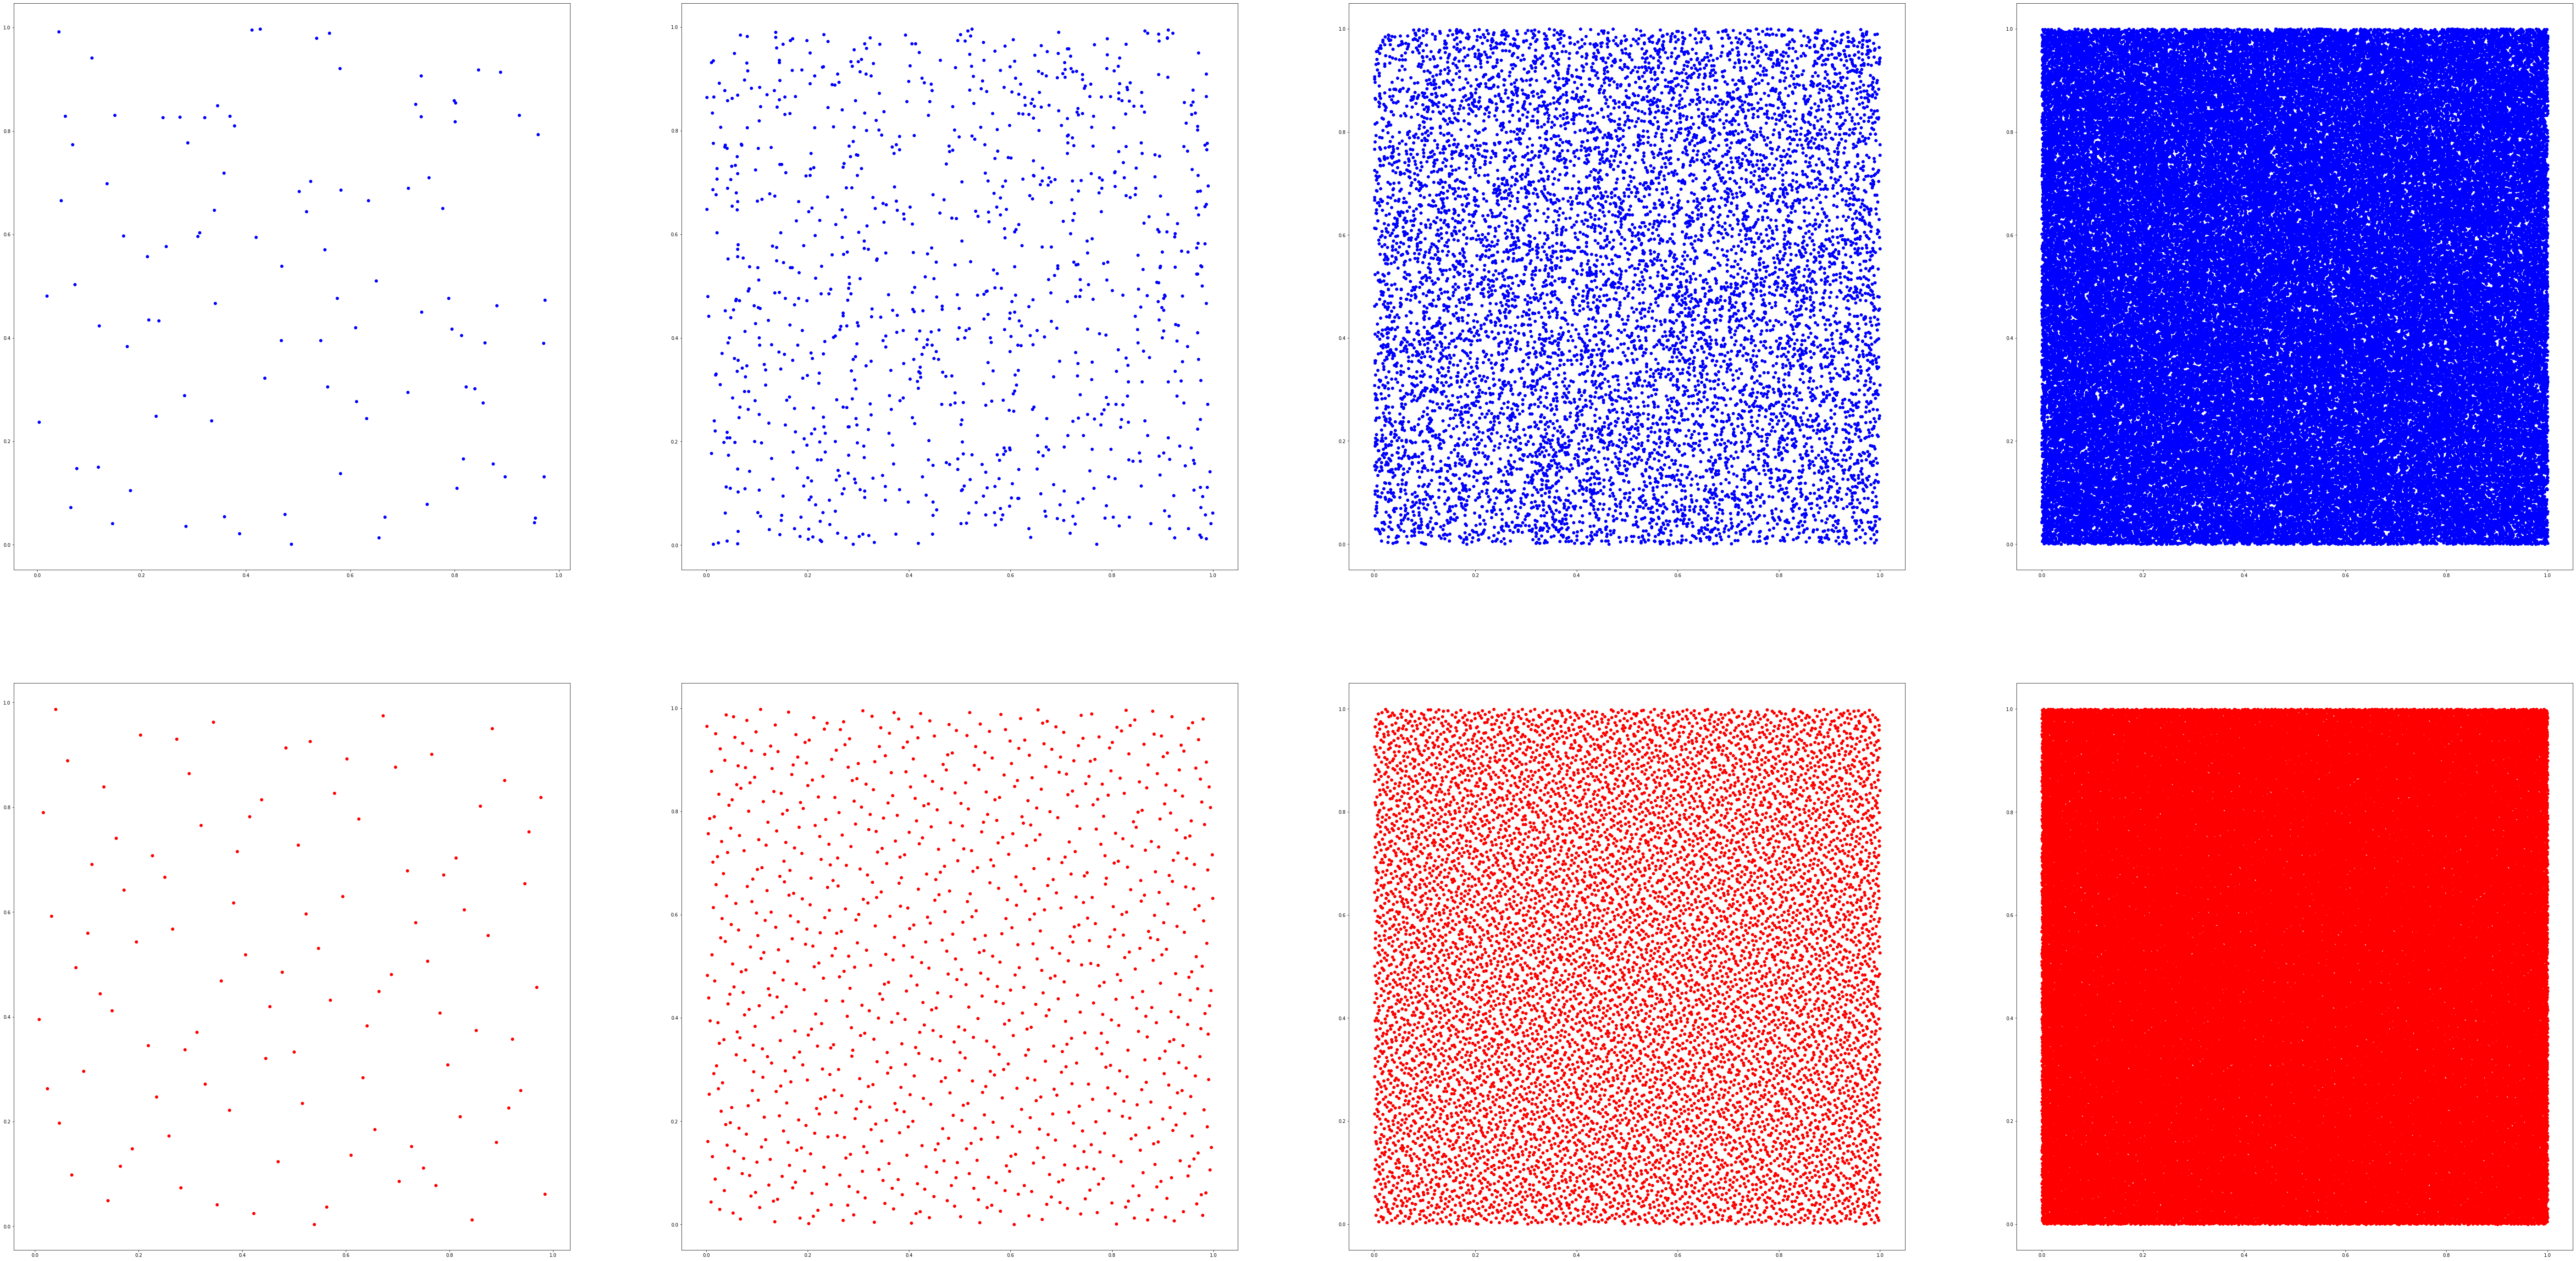

In [ ]:
# two dimensional
fig,axes=plt.subplots(2,4,figsize=(100,50))
for i in range(2,6):
  rand_data_2d = np.random.uniform(0,1,size=(10**i,2))
  sequence_2d = ot.LowDiscrepancySequence(ot.HaltonSequence(2))
  halton_data_2d = np.array(sequence_2d.generate(10**i))
  axes[0][i-2].plot(rand_data_2d[:,0],rand_data_2d[:,1],'bo')
  axes[1][i-2].plot(halton_data_2d[:,0],halton_data_2d[:,1],'ro')

The first row of graphs are generated by np.random and the second row of graphs are generated by `Halton sequence`. Each column represents different number of datapoints, varying from 100 to 100,000.

In 2d, we can see more clearly that the points are more evenly distributed in `Halton sequence` than in sequence generated by np.random.

2.2.2 `Halton` versus `scrambled Halton`(If interested)

One of the disadvantages of `Halton sequence` is that when some large prime numbers are used as the base, the distribution of the sequence will not be uniform when the number of points is not so large, and only when the number of points is close to the power of the base number will the distribution be gradually uniform. For `Halton`, a common variation is `scrambled Halton`.

If interested, please refer to https://web.maths.unsw.edu.au/~josefdick/MCQMC_Proceedings/MCQMC_Proceedings_2012_Preprints/100_Keller_tutorial.pdf

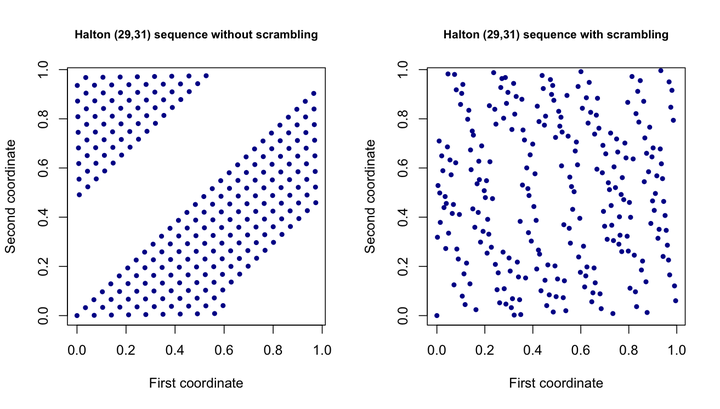

2.2.3 Hammersley versus np.random(If interested)

For `Hammersley sequence`: $ Xi:=(\frac{i}{N},Φ_{b1}(i),...,Φ_{bn}(i)) $

Similar to `Halton`, `Hammersley` is based on the `Van der Corput` sequence, but the `Hammersley` point set can only generate a fixed number of samples(because we need to set N), while `Halton` sequence can generate infinite samples.


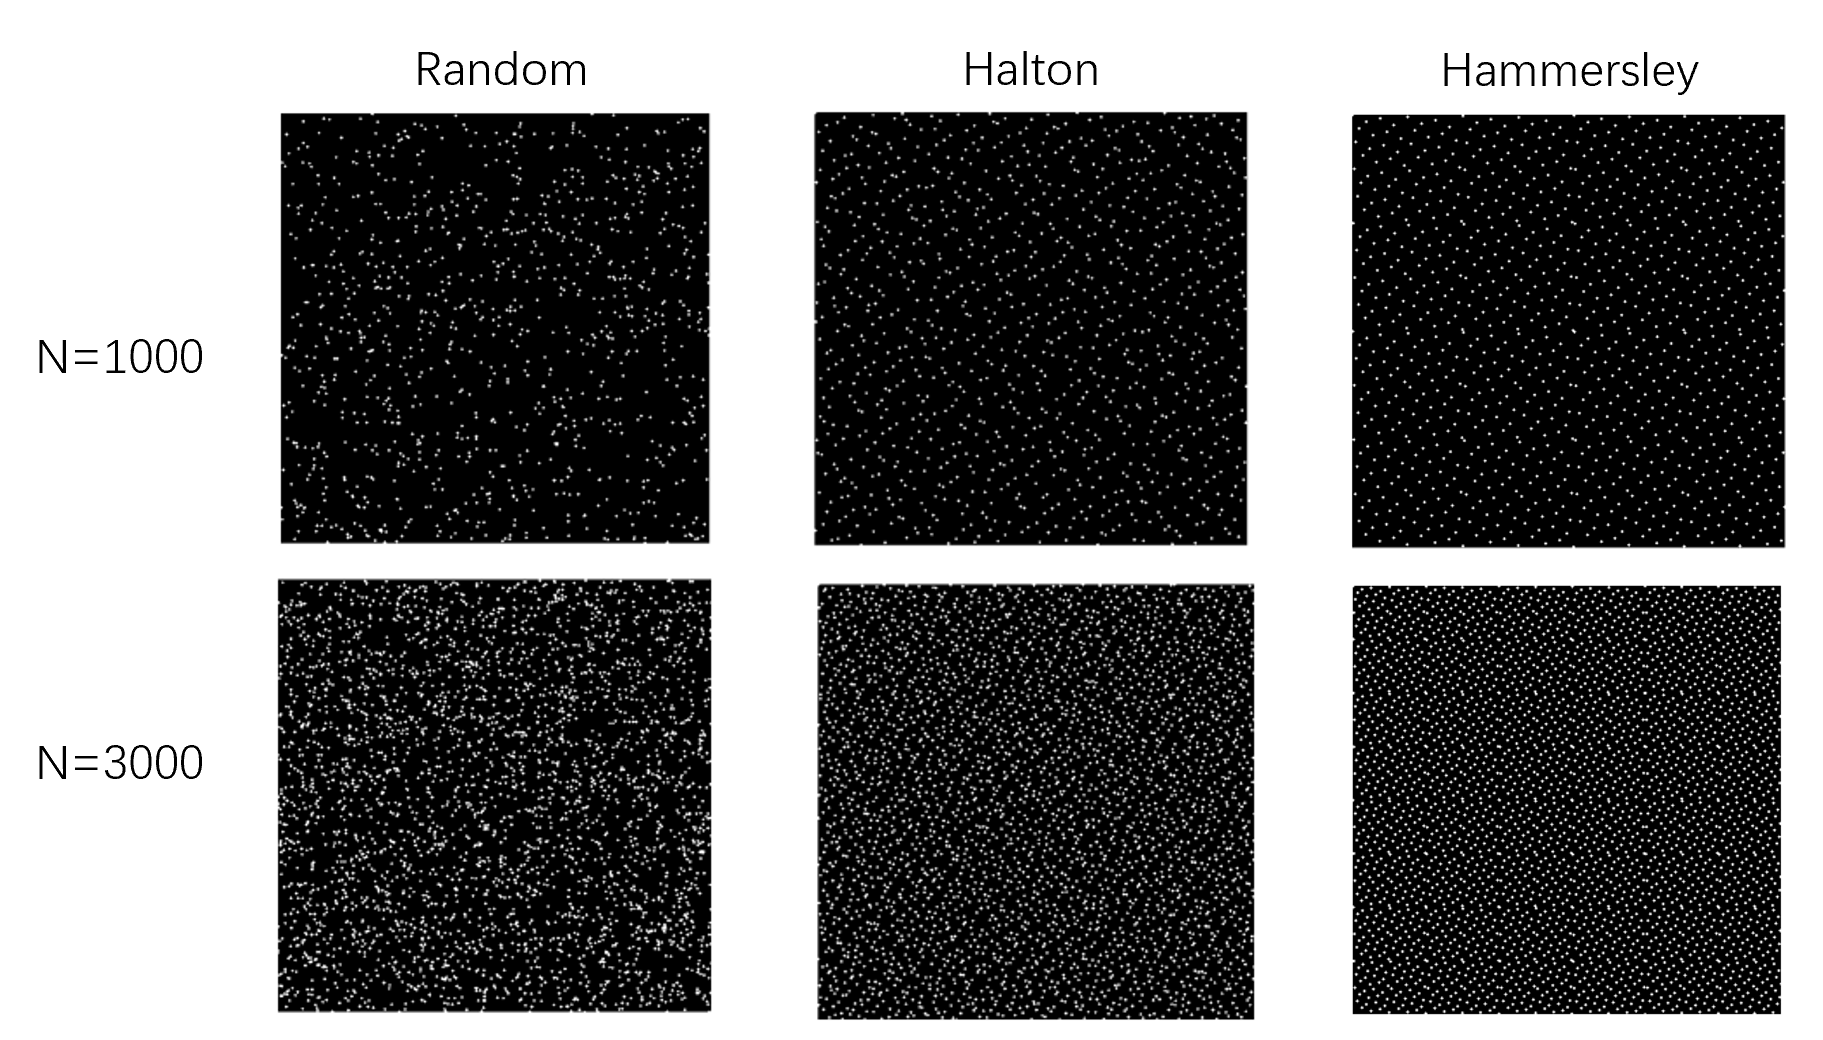

## **3. Transfrom Random distribution to Normal distribution**

In [ ]:
# Plot the normal probability plot to see the orginal distribution :
def checknormal (x):
  # Calculate mean and standard deviation
  mu, std = np.mean(x), np.std(x)
  # Create a normal distribution with the same mean and standard deviation
  norm_dist = np.random.normal(mu, std, 1000000)
  # Sort the data and the normal distribution
  data_sorted = np.sort(x)
  norm_dist_sorted = np.sort(norm_dist)
  # Calculate the quantiles for the data and the normal distribution
  quantiles_data = np.arange(len(x)) / float(len(x))
  quantiles_norm_dist = np.arange(len(norm_dist)) / float(len(norm_dist))
  # Plot the normal probability plot
  plt.plot(norm_dist_sorted, quantiles_norm_dist, color='blue')
  plt.plot(data_sorted, quantiles_data, color='red', marker='.', linestyle='none')
  plt.xlabel('Quantiles of Normal Distribution')
  plt.ylabel('Ordered Values')
  plt.title('Normal Probability Plot')
  plt.show()

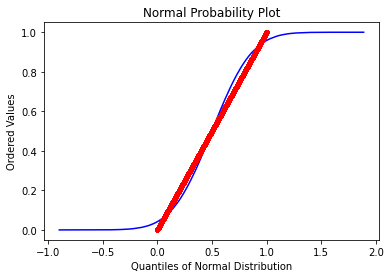

In [ ]:
# Call the function:
checknormal(LCG_output_1)

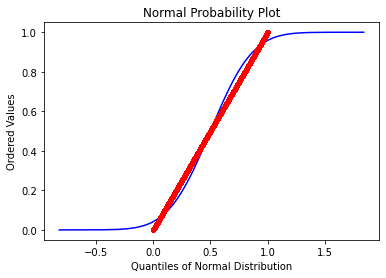

In [ ]:
# Call the functio:
checknormal(LCG_output_2)

I have plotted two normal probability plots above to examine whether the data I generated follows any distributional pattern and to validate whether the data that I processed subsequently becomes normally distributed. The red line is drawn based on my data, while the blue line represents a set of data that I created with the same mean and standard deviation as the red data and following a normal distribution. From thoes two graphes shown above, we can see that the unprocessed data does not follow a normal distribution, and there is not much overlap between the red and blue lines.

As the random data is uniformly distributed instead of normally distributed, we can use Box-Muller method to transform the data.

The formula:

$Z_1 = R cos(θ) = \sqrt{-2lnU_1} cos(2πU_2)$

$Z_2 = R sin(θ) = \sqrt{-2lnU_1} sin(2πU_2)$

where:
* $U_1$: one of the uniformly distributed 
random numbers
* $U_2$: the other uniformly distributed random numbers
* $Z_1$: the normally distributed random number transformed from $U_1$
* $Z_2$: the normally distributed random number transformed from $U_2$

In [ ]:
# Transform to normal random variables using Box_Muller transform
array_1 = np.array(LCG_output_1)
array_2 = np.array(LCG_output_2)

Z1 = np.sqrt(-2*np.log(array_1)) * np.cos(2*np.pi*array_2)
Z2 = np.sqrt(-2*np.log(array_1)) * np.sin(2*np.pi*array_2)

print("Mean of Z1:", np.mean(Z1))
print("Variance of Z1:", np.var(Z1))
print("Mean of Z2:", np.mean(Z2))
print("Variance of c2:", np.var(Z2))

Mean of Z1: 0.0019318600442888593
Variance of Z1: 0.9976588610592745
Mean of Z2: 0.0009290429254031666
Variance of c2: 1.000498644166228


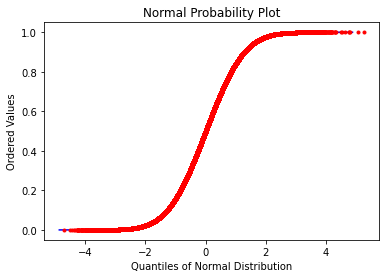

In [ ]:
# Observe Z1
# Call the checknormal function again to see if the random variables becomes to normal random variables:
checknormal(Z1)

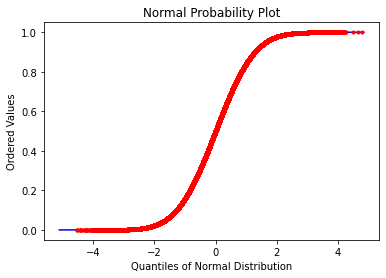

In [ ]:
# Observe Z2
#Call the checknormal function again to see if the random variables becomes to normal random variables:
checknormal(Z2)

We plot the normal probability plots from the two sets of transformed data again. By comparing the four graphs, we see that the previous two sets of uniformly distributed random variable have sucessfully transformed to standard normal distributed random variable.

## **4. Transform Uncorrelated Normal Random Variable Into Correlated Normal Random Varibale**

Cholesky decomposition is a method to generate correlated random numbers with specific correlation structures from uncorrelated random numbers by the following 2  steps:


1.   Decompose the desired covariance matrix into product of a lower triangular matrix (L) and its transpose (LT) using the Cholesky factorization.
2.   Multiply the generated independent Normal random variables by the lower triangular matrix (L) to obtain a set of correlated Gaussian random variables.

**The formula:**

$cov = L * L^T$

$y = L* X$

Where:


*   $cov$ is the desired covariance matrix you want to generate
*   $L$ is the lower triangular matrix of $cov$
*   $X$ is the unprocessed data
*   $y$ is the transformed correlated normally distributed random variable

In [ ]:
# Using Cholesky decomponsition to convert 
# uncorrlated random variable into correalted 
# noraml random variable:
cov = [[9,1],[1,1]]
L = np.linalg.cholesky(cov)
Z1_Z2 = np.vstack((Z1,Z2))
y = np.dot(L,Z1_Z2)

In [ ]:
# Check the mean and std of new matrix
np.cov(y)

array([[8.97893873, 0.99473644],
       [0.99473644, 0.99953447]])

In [ ]:
# Compute the correlation of new matrix
np.corrcoef(y)

array([[1.        , 0.33204477],
       [0.33204477, 1.        ]])

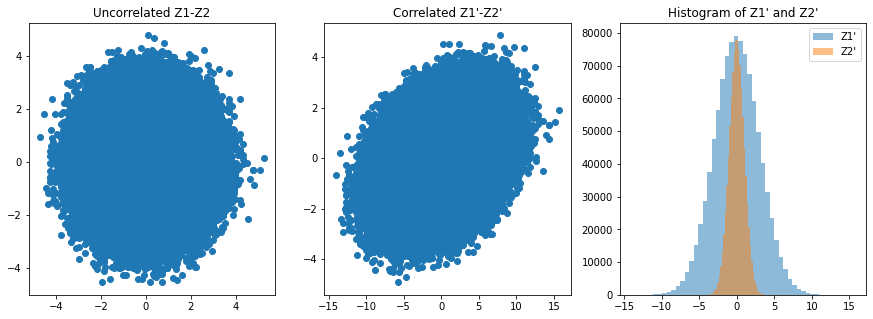

In [ ]:
# Visualize the correlation:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax[0].scatter(Z1, Z2)
ax[0].set_title('Uncorrelated Z1-Z2')
ax[1].scatter(y[0,:],y[1,:])
ax[1].set_title("Correlated Z1'-Z2'")
ax[2].hist(y[0,:], bins=50, alpha=0.5, label="Z1'")
ax[2].hist(y[1,:], bins=50, alpha=0.5, label="Z2'")
ax[2].legend()
ax[2].set_title("Histogram of Z1' and Z2'")
plt.show()

If we want to make some other variation to our Z1 and Z2, for example changing the mean and variance, we can simply make some adjustment by the followings:

In [ ]:
# Build an adjuster to adjust the mean and std
def adjustor(mu, std, Z):
  x = mu + std * Z
  return x

X1= adjustor(5, 1, y[0,:])
X2 = adjustor(2, 1, y[1,:])

print("Mean of X1:", np.mean(X1))
print("Variance of X1:", np.var(X1))
print("Mean of X2:", np.mean(X2))
print("Variance of X2:", np.var(X2))

Mean of X1: 5.005795580132867
Variance of X1: 8.97892974953347
Mean of X2: 2.0015198634181846
Variance of X2: 0.9995334658027729


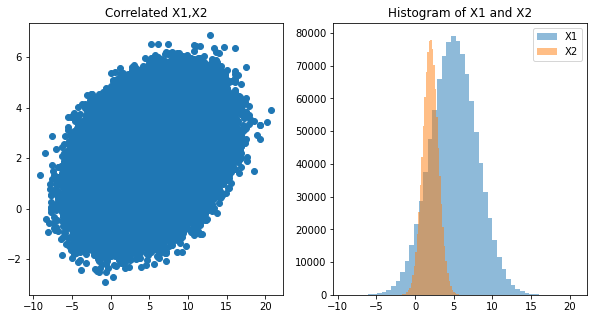

In [ ]:
# Visualize the correlation:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].scatter(X1,X2)
ax[0].set_title('Correlated X1,X2')
ax[1].hist(X1, bins=50, alpha=0.5, label='X1')
ax[1].hist(X2, bins=50, alpha=0.5, label='X2')
ax[1].legend()
ax[1].set_title('Histogram of X1 and X2')
plt.show()